In [3]:
import pandas as pd
import numpy as np

In [25]:
# Loading mapping files
mapping_to_token = pd.read_csv("../csv_files/bookstore_csv/mapping_token.csv")
mapping_to_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_ast.csv")
mapping_to_comp_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_comp_ast.csv")
mapping_to_relative_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_relative_ast.csv")

d_type = {"commit_hash" : "str", 	"num_additions" : int,	"num_deletions": int, "filename" : "str"}

# Function for loading data
def load_data(file):
    df = pd.read_csv(file)
    df = df[df.filename.str.endswith(".java")]
    return pd.DataFrame({"commit_hash": df.commit_hash, "changes": pd.to_numeric(df.num_additions) + pd.to_numeric(df.num_deletions), "filename": df.filename})

# Loading data
data_java = load_data("../csv_files/bookstore_csv/output_java.csv")
data_java_nws = load_data("../csv_files/bookstore_csv/output_nws.csv") 
data_token = load_data("../csv_files/bookstore_csv/output_token.csv")
data_ast = load_data("../csv_files/bookstore_csv/output_ast.csv")
data_comp_ast = load_data("../csv_files/bookstore_csv/output_comp_ast.csv")
data_relative_ast = load_data("../csv_files/bookstore_csv/output_relative_ast.csv")


In [26]:
# Setting up dataframes
df_java = data_java.set_index(["commit_hash", "filename"])
df_java_nws = data_java_nws.set_index(["commit_hash", "filename"])
df_token = pd.merge(data_token, mapping_to_token, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_token"}).drop(columns=["to", "commit_hash_token"]).set_index(["commit_hash", "filename"])
df_ast = pd.merge(data_ast, mapping_to_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_ast"}).drop(columns=["to", "commit_hash_ast"]).set_index(["commit_hash", "filename"])
df_comp_ast = pd.merge(data_comp_ast, mapping_to_comp_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_comp_ast"}).drop(columns=["to", "commit_hash_comp_ast"]).set_index(["commit_hash", "filename"])
df_rel_ast = pd.merge(data_relative_ast, mapping_to_relative_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_rel_ast"}).drop(columns=["to", "commit_hash_rel_ast"]).set_index(["commit_hash", "filename"])

In [30]:
def mergeall(**dfs):
    from functools import reduce
    items = dfs.items()
    table = df_java.rename(columns = dict(changes="repo"))
    for key, df in items:
        table = pd.merge(table, df.rename(columns = dict(changes=key)), left_index=True, right_index=True, validate="1:1", how="outer")
    return table

df_merged = mergeall(nws = df_java_nws, token = df_token, ast = df_ast, compressed_ast = df_comp_ast, relative_ast = df_rel_ast).fillna(0, downcast="int64")
df_merged.isna().sum()

repo              0
nws               0
token             0
ast               0
compressed_ast    0
relative_ast      0
dtype: int64

<Axes: xlabel='commit_hash,filename'>

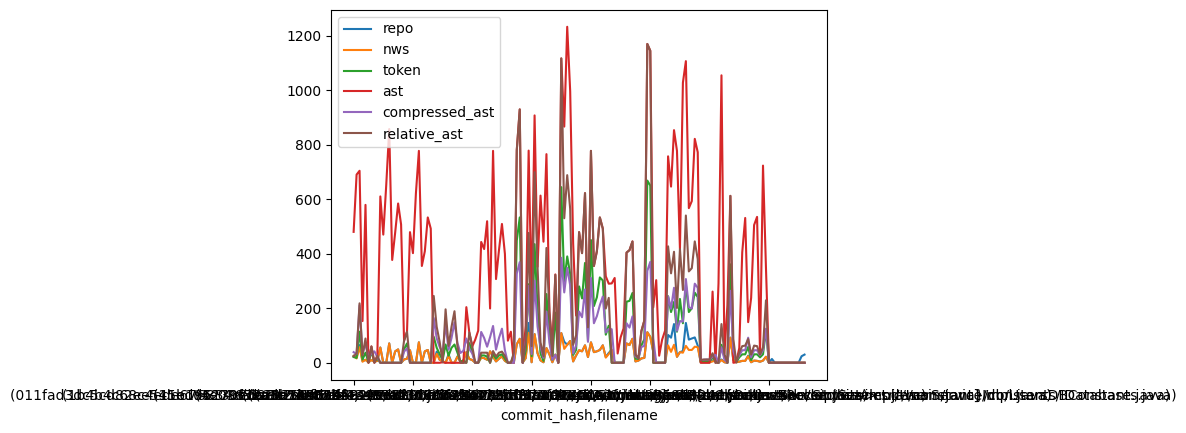

In [40]:
df_merged.plot()

<Axes: >

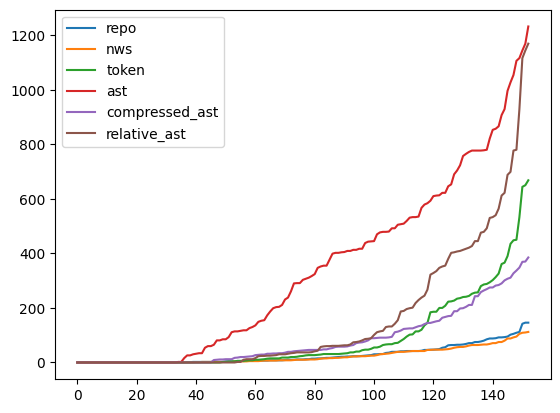

In [39]:
df = pd.DataFrame({k : np.array(df_merged[k].sort_values()) for k in df_merged.columns})
df.plot()

<Axes: >

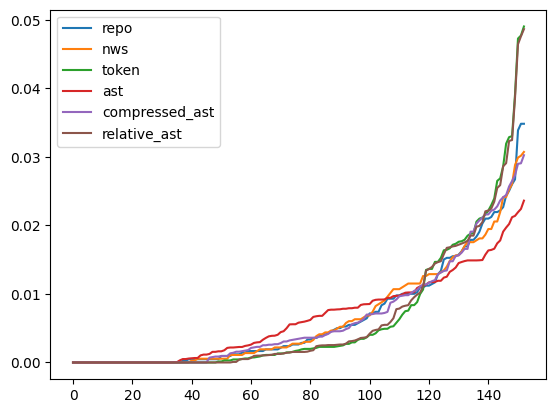

In [41]:
(df / df.sum()).plot()

<Axes: >

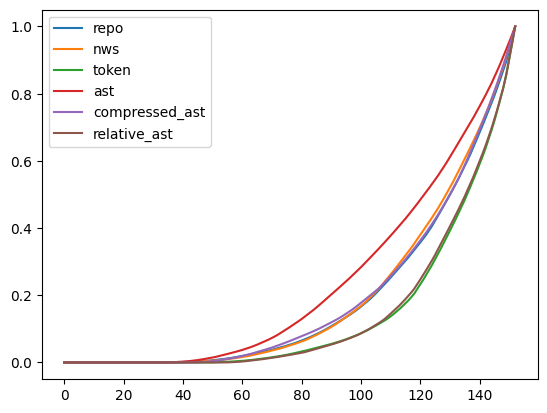

In [42]:
(df.cumsum() / df.sum()).plot()

<Axes: >

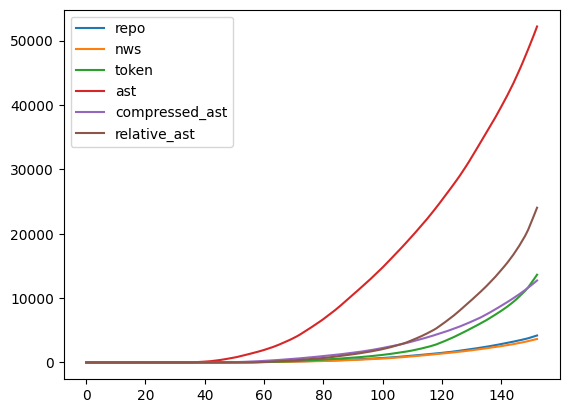

In [43]:
df.cumsum().plot()

<Axes: >

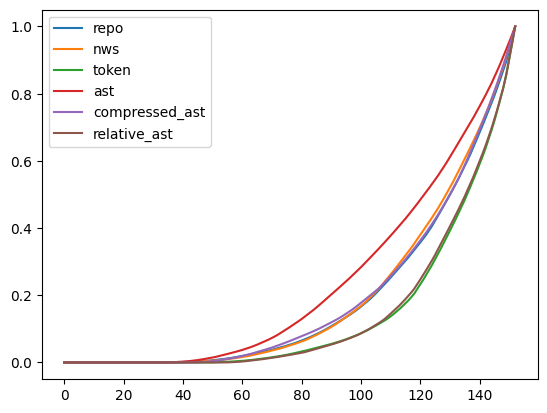

In [44]:
(df.cumsum() / df.sum()).plot()

In [46]:
#find størrelsen af filen for at finde en relativ ændring 
df_merged[df_merged.token == 0][df_merged.nws != 0]

C:\Users\boran\AppData\Local\Temp\ipykernel_13180\4186556791.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merged[df_merged.token == 0][df_merged.nws != 0]


repo  \
commit_hash                              filename                                                   
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7 OnlineBookStore/servlets/AddBookServlet.java          56   
                                         OnlineBookStore/servlets/ReceiptServlet.java          71   
                                         OnlineBookStore/servlets/UserLoginServlet.java        42   
                                         OnlineBookStore/servlets/UserRegisterServlet.java     49   
                                         OnlineBookStore/src/test/AddBookServlet.java          46   
                                         OnlineBookStore/src/test/ReceiptServlet.java          75   
                                         OnlineBookStore/src/test/UserLoginServlet.java        42   
                                         OnlineBookStore/src/test/UserRegisterServlet.java     47   
45edd52796dc2025b46c9592678dc9be5f2b4178 src/main/java/config/DBConnection.java                39   
                                         src/main/java/servlets/DBConnection.java              42   
4a307fabea604be9cb5bf92a5c65c29e9f0028f4 src/main/java/servlets/ReceiptServlet.java             1   
668f6fb87f546fdb6d61b19913868ae6cb37c588 src/main/java/com/bittercode/service/impl/UserS...     1   
ba5e7a6d5df4ca95e2306c062947e5df3b1026cd src/main/java/com/bittercode/config/DBUtil.java       48   
                                         src/main/java/config/DBConnection.java                41   

                                                                                             nws  \
commit_hash                              filename                                                  
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7 OnlineBookStore/servlets/AddBookServlet.java         56   
                                         OnlineBookStore/servlets/ReceiptServlet.java         71   
                                         OnlineBookStore/servlets/UserLoginServlet.java       42   
                                         OnlineBookStore/servlets/UserRegisterServlet.java    49   
                                         OnlineBookStore/src/test/AddBookServlet.java         46   
                                         OnlineBookStore/src/test/ReceiptServlet.java         75   
                                         OnlineBookStore/src/test/UserLoginServlet.java       42   
                                         OnlineBookStore/src/test/UserRegisterServlet.java    47   
45edd52796dc2025b46c9592678dc9be5f2b4178 src/main/java/config/DBConnection.java               39   
                                         src/main/java/servlets/DBConnection.java             42   
4a307fabea604be9cb5bf92a5c65c29e9f0028f4 src/main/java/servlets/ReceiptServlet.java            1   
668f6fb87f546fdb6d61b19913868ae6cb37c588 src/main/java/com/bittercode/service/impl/UserS...    1   
ba5e7a6d5df4ca95e2306c062947e5df3b1026cd src/main/java/com/bittercode/config/DBUtil.java      48   
                                         src/main/java/config/DBConnection.java               41   

                                                                                             token  \
commit_hash                              filename                                                    
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7 OnlineBookStore/servlets/AddBookServlet.java            0   
                                         OnlineBookStore/servlets/ReceiptServlet.java            0   
                                         OnlineBookStore/servlets/UserLoginServlet.java          0   
                                         OnlineBookStore/servlets/UserRegisterServlet.java       0   
                                         OnlineBookStore/src/test/AddBookServlet.java            0   
                                         OnlineBookStore/src/test/ReceiptServlet.java            0   
                                         OnlineBookStore/sr

In [9]:
# from collections import deque
# from tree_sitter import Language, Parser
# import os
# from formast.__main__ import JAVA_LANGUAGE

# parser = Parser()
# parser.set_language(JAVA_LANGUAGE)

# with open("..\java_files\simple.java", "rb") as f:
#     code = f.read()
# tree = parser.parse(code)

# tree

In [23]:
# def process_tree_relatively(tree):
#     output = []
#     stack = deque([(tree.root_node, -1)])
#     while stack:
#         node, parent_index = stack.pop()
#         if node.type == 'program':
#             output.append(f'N {node.type}')
#             parent_index = len(output) - 1
#         elif node.type in ['modifiers', 'identifier', 'class_body']:
#             output.append(f'N {node.text.decode("utf-8")}')
#             output.append(f'B {node.type} -1')
#             parent_index = len(output) - 1
#         elif node.type == 'class_declaration':
#             child_indices = []
#             for i, child in enumerate(node.children):
#                 if child.type in ['modifiers', 'identifier', 'class_body']:
#                     child_indices.append(i - len(node.children))
#             output.append(f'B {node.type} {" ".join(map(str, child_indices))}')
#             parent_index = len(output) - 1
#         for child in reversed(node.children):
#             stack.append((child, parent_index))
#     return '\n'.join(output)


# print(process_tree_relatively(tree))

N program
B class_declaration -4 -2 -1
N public
B modifiers -1
N A
B identifier -1
N {}
B class_body -1


In [7]:
# from tree_sitter import Node

# def print_node(node: Node, indent: str = ""):
#     print(f"{indent}{node.type} [{node.start_point[0]}, {node.start_point[1]}] - [{node.end_point[0]}, {node.end_point[1]}]")
#     for child in node.children:
#         print_node(child, indent + "  ")

# print_node(tree.root_node)

program [0, 0] - [103, 0]
  package_declaration [0, 0] - [0, 17]
    package [0, 0] - [0, 7]
    identifier [0, 8] - [0, 16]
    ; [0, 16] - [0, 17]
  import_declaration [2, 0] - [2, 27]
    import [2, 0] - [2, 6]
    scoped_identifier [2, 7] - [2, 26]
      scoped_identifier [2, 7] - [2, 14]
        identifier [2, 7] - [2, 11]
        . [2, 11] - [2, 12]
        identifier [2, 12] - [2, 14]
      . [2, 14] - [2, 15]
      identifier [2, 15] - [2, 26]
    ; [2, 26] - [2, 27]
  import_declaration [3, 0] - [3, 27]
    import [3, 0] - [3, 6]
    scoped_identifier [3, 7] - [3, 26]
      scoped_identifier [3, 7] - [3, 14]
        identifier [3, 7] - [3, 11]
        . [3, 11] - [3, 12]
        identifier [3, 12] - [3, 14]
      . [3, 14] - [3, 15]
      identifier [3, 15] - [3, 26]
    ; [3, 26] - [3, 27]
  import_declaration [4, 0] - [4, 22]
    import [4, 0] - [4, 6]
    scoped_identifier [4, 7] - [4, 21]
      scoped_identifier [4, 7] - [4, 16]
        identifier [4, 7] - [4, 11]
        

In [30]:
# def process_tree(tree, code):
#     lines = []
#     def process_node(node):
#         if node.type == 'identifier':
#             lines.append(f'N {code[node.start_byte:node.end_byte].decode("utf-8")}')
#             lines.append(f'B identifier -1')
#             return len(lines) - 1
#         elif node.type == 'class':
#             return None
#         elif node.type == 'class_body':
#             children = []
#             for child in node.children:
#                 if child.type not in ['{', '}']:
#                     child_index = process_node(child)
#                     if child_index is not None:
#                         children.append(child_index)
#             lines.append(f'B {node.type}')
#             return len(lines) - 1
#         else:
#             children = []
#             for child in node.children:
#                 child_index = process_node(child)
#                 if child_index is not None:
#                     children.append(child_index)
#             connections = [-len(lines) + i for i in children]
#             lines.append(f'B {node.type} {" ".join(map(str, connections))}')
#             return len(lines) - 1
#     process_node(tree.root_node)
#     return '\n'.join(lines)

# print(process_tree(tree, code))        

B public 
B modifiers -1
N A
B identifier -1
B class_body
B class_declaration -4 -2 -1
B program -1


In [10]:
# import base64
# import hashlib

# def process_tree_comp(tree):
#     lookup = {}
#     lines = []

#     def process_node(node):
#         line = ""

#         if node.children:
#             children = []
#             for child in node.children:
#                 child_result = process_node(child)
#                 if child_result is not None:
#                     children.append(child_result)
#             line = 'B {} {}'.format(node.type, ' '.join(map(str, children)))
#         else:
#             text = node.text.decode('utf-8')
#             line = 'L {}'.format(text)

#         idx = lookup.get(line)
#         if idx is not None:
#             return idx

#         hash_object = hashlib.sha256(line.encode('utf-8'))
#         hash_value = int.from_bytes(hash_object.digest()[:8], byteorder='big', signed=True)
#         idx = base64.urlsafe_b64encode(hash_value.to_bytes(8, byteorder='big', signed=True)).rstrip(b'=').decode('ascii')
#         lines.append('{} {}'.format(idx, line))
#         lookup[line] = idx

#         return idx

#     process_node(tree.root_node)
#     return '\n'.join(lines) 

# print(process_tree_comp(tree))

_6xEEtLT7vg L public
iLRoi73V-RI B modifiers _6xEEtLT7vg
2usUse1FW98 L class
Jf7gA03GbKE L A
f1dtMFaAKXw L {
QRb-VDvN7n0 L }
_ETJtzenYkI B class_body f1dtMFaAKXw QRb-VDvN7n0
FwqmimPqmxY B class_declaration iLRoi73V-RI 2usUse1FW98 Jf7gA03GbKE _ETJtzenYkI
M8gnXQfEJJs B program FwqmimPqmxY
